# Global Terrorism Data Analysis



In [154]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)



# Where to save the figures
PROJECT_ROOT_DIR = "."
images = "images"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, images, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import pandas as pd

DATA_PATH = os.path.join("datasets", "terrorism")
#fn that reads csv from the defined location, so if csv updates it can take care of it
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset.csv")
    return pd.read_csv(csv_path,encoding="UTF-8")

In [3]:
terrorism=load_data()

/Users/onion8/miniconda3/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
#Renaming the columns to avoid any ambiguity
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','nperps':'terrorists','nkillus':'US_KILL'},inplace=True)

In [5]:
#feature engineering
terrorism=terrorism[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','terrorists']]
terrorism['casualities']=terrorism['Killed']+terrorism['Wounded']

## Histogram Analysis:

### In the month of May(5th month) the occurance of terrorist activity is more
### Terrorism activity increased significantly after year 2010

Saving figure attribute_histogram_plots


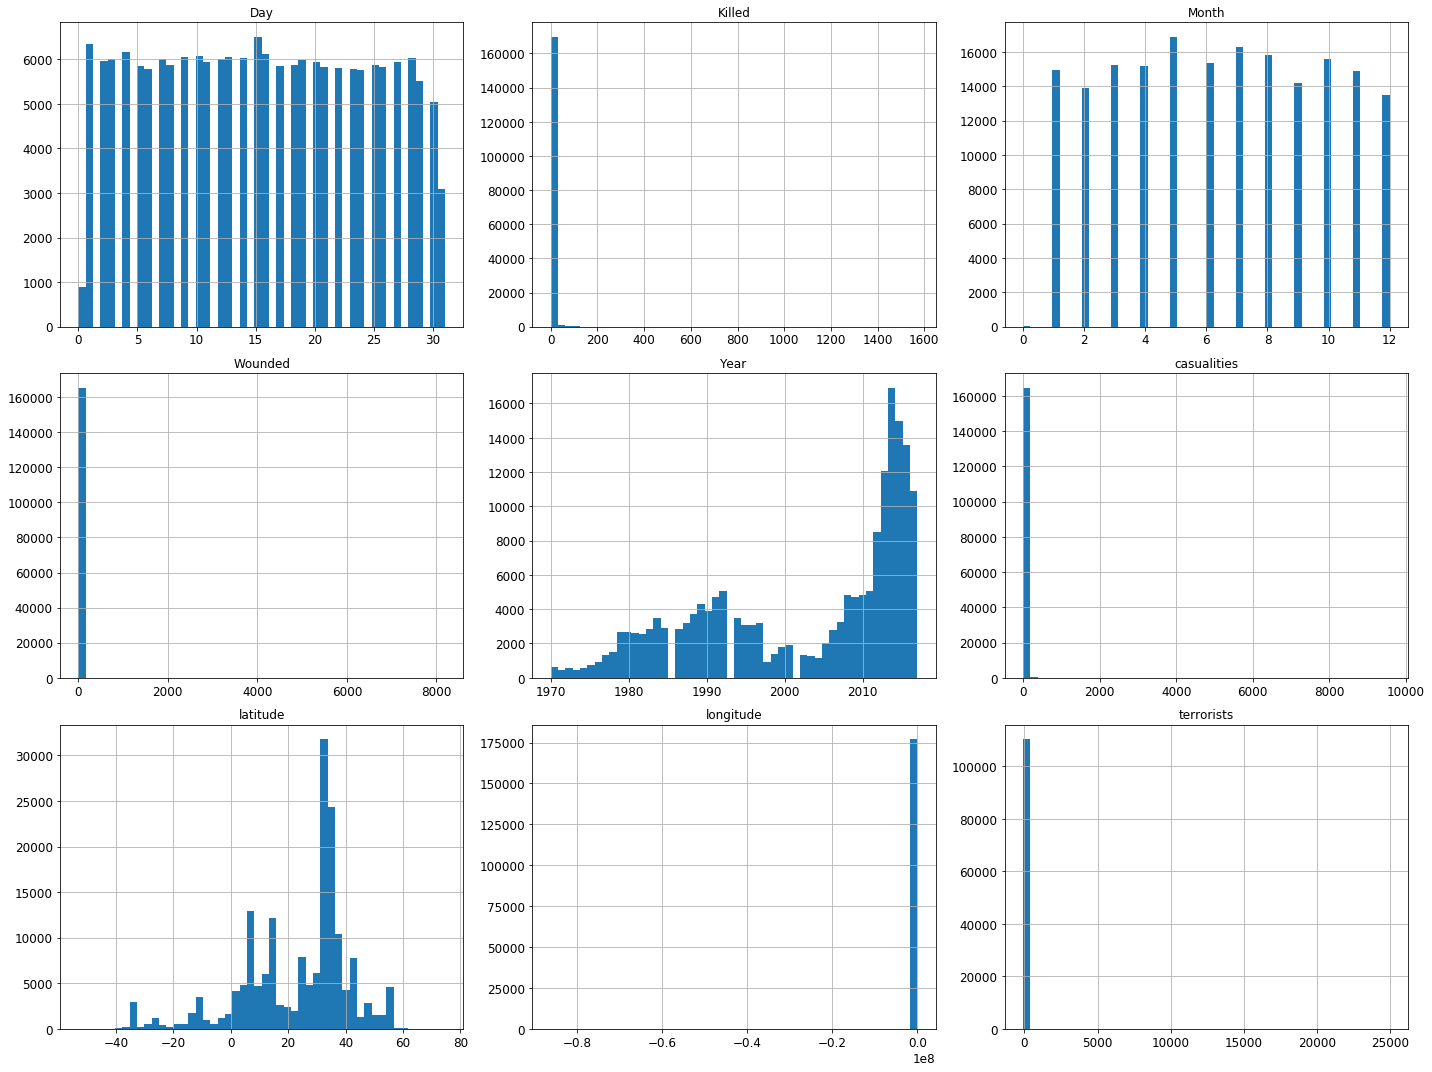

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
terrorism.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Scatter plot analysis :
### Geographical distribution of Casualities(by size) and number of terrorists(by color)

Saving figure Casualties


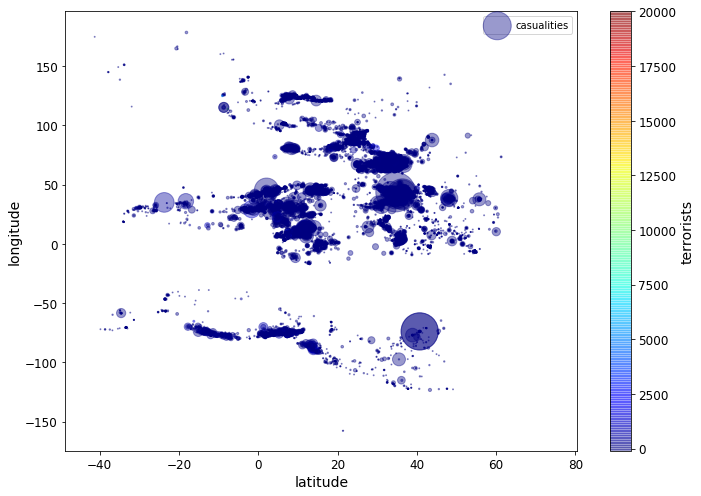

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
terrorism.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4,
    s=terrorism['Killed'] ,label="casualities", figsize=(10,7),
    c='terrorists', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
save_fig("Casualties")
plt.legend()

Saving figure Active_terrorists_grp


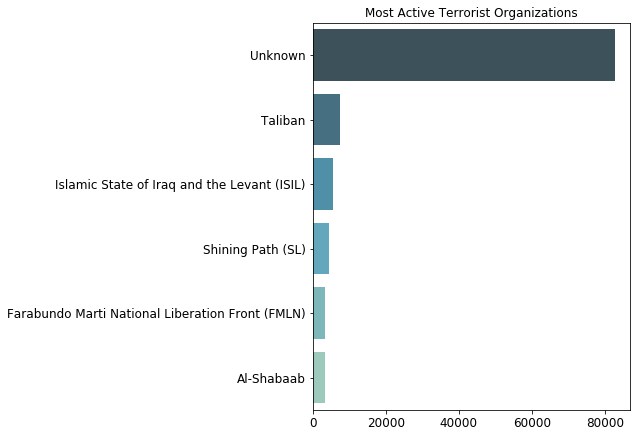

In [157]:
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 6)) 
sns.barplot( y = terrorism['Group'].value_counts().head(6).index,
            x = terrorism['Group'].value_counts().head(6).values,
                palette="GnBu_d")
save_fig("Active_terrorists_grp")
ax.set_title('Most Active Terrorist Organizations' );

In [144]:
#function to display wordclouds
def wcloud_dsplay(x):
    plt.figure(figsize=[20,10])
    plt.imshow(x, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [145]:
motives=terrorism[['Motive']]

target=terrorism[['Target_type']]

types=terrorism[['AttackType']]

summary=terrorism[['Summary']]


## Wordclouds:
### 1- Motives

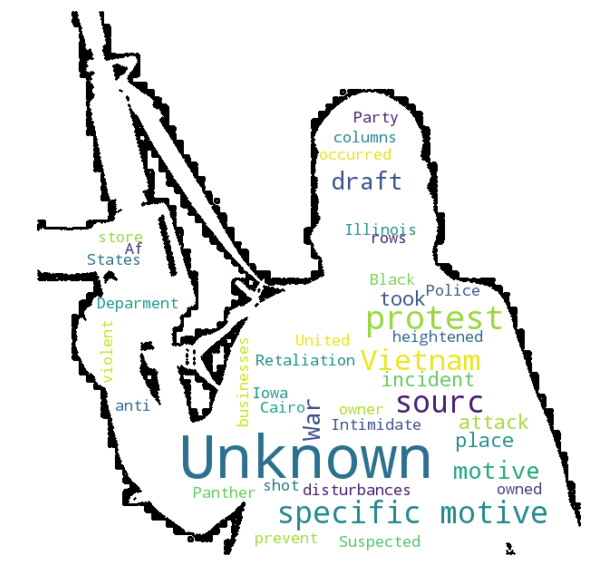

In [146]:
from wordcloud import WordCloud
from PIL import Image
mask = np.array(Image.open('/Users/onion8/ml/images/terror.png'))
wc = WordCloud(background_color="white", max_words=100, mask=mask,
               contour_width=3, contour_color='Black')

# Generate a wordcloud
wc=wc.generate(str(motives))
wc.to_file("/Users/onion8//ml/images/terror_motives.jpg")
wcloud_dsplay(wc)

### 2- Target

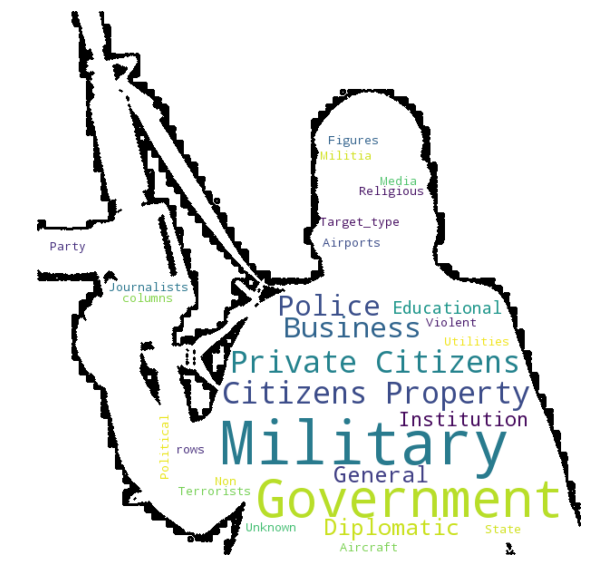

In [159]:
wc=wc.generate(str(target))
wc.to_file("/Users/onion8//ml/images/terror_target.jpg")
wcloud_dsplay(wc)

### 3- Types

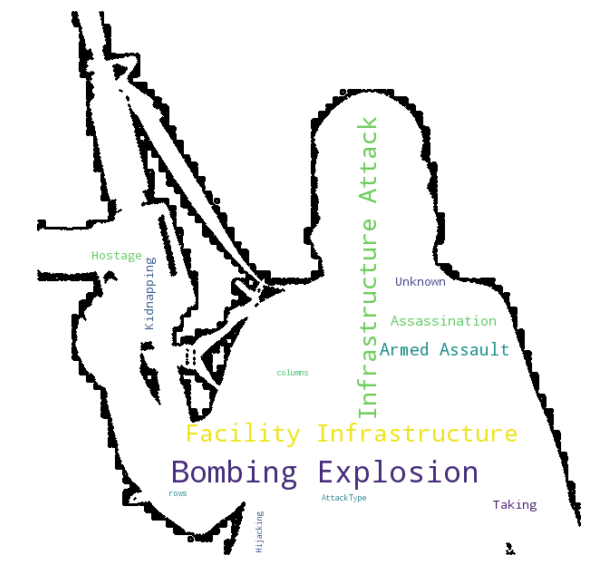

In [148]:
wc=wc.generate(str(types))
wc.to_file("/Users/onion8//ml/images/terror_type.jpg")
wcloud_dsplay(wc)

### 4- Summary

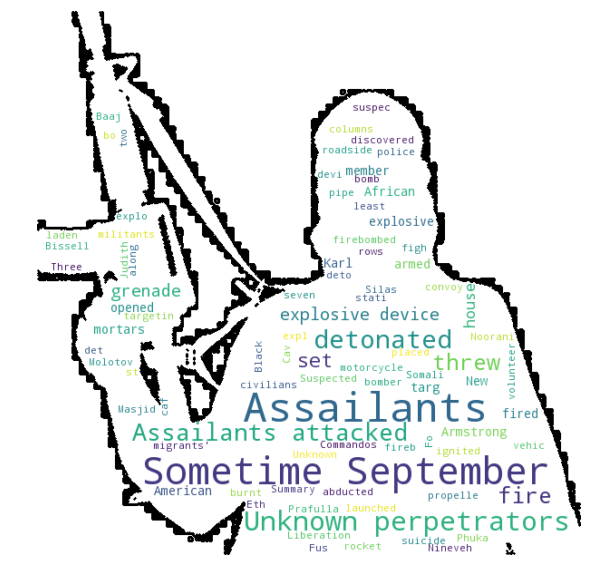

In [149]:
wc=wc.generate(str(summary))
wc.to_file("/Users/onion8//ml/images/terror_smry.jpg")
wcloud_dsplay(wc)

## Numerical attributes analysis:
### 75% terrorism activities happened before 23rd of each month ,9th month of each year and before 2014

In [158]:
terrorism.describe()

,Day,Killed,Month,Wounded,Year,casualities,latitude,longitude,terrorists
count,181691.000000,171378.000000,181691.000000,165380.000000,181691.000000,164817.000000,177135.000000,1.771340e+05,110576.000000
mean,15.505644,2.403272,6.467277,3.167668,2002.638997,5.296128,23.498343,-4.586957e+02,-65.361154
std,8.814045,11.545741,3.388303,35.949392,13.259430,42.069023,18.569242,2.047790e+05,216.536633
min,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,-53.154613,-8.618590e+07,-99.000000
25%,8.000000,0.000000,4.000000,0.000000,1991.000000,0.000000,11.510046,4.545640e+00,-99.000000
50%,15.000000,0.000000,6.000000,0.000000,2009.000000,1.000000,31.467463,4.324651e+01,-99.000000
75%,23.000000,2.000000,9.000000,2.000000,2014.000000,4.000000,34.685087,6.871033e+01,1.000000
max,31.000000,1570.000000,12.000000,8191.000000,2017.000000,9574.000000,74.633553,1.793667e+02,25000.000000


In [26]:
#Imputing nan values of categorical data points by their mode(most frequent)

terrorism_cat=terrorism.select_dtypes(include=[np.object])
terrorism_cat = terrorism_cat.fillna(terrorism_cat.mode().iloc[0])

#Merging it again to the base df
cols_to_use = terrorism.columns.difference(terrorism_cat.columns)
terrorism=pd.merge(terrorism[cols_to_use], terrorism_cat,left_index=True, right_index=True, how='outer')
#Separating features and labels
terrorism_feat=terrorism.drop('Group',axis=1)
terrorism_labels=terrorism['Group']


In [27]:
#Separating numerical and categorical features so that they can be treated differently in data preparation for training
terrorism_num= terrorism_feat.select_dtypes(include=[np.number])
terrorism_cat=terrorism_feat.select_dtypes(include=[np.object])

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import OneHotEncoder

#numerical pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        
        ('std_scaler', StandardScaler()),
    ])
#categorical pipeline
cat_pipeline= Pipeline([
        
        
        ('1-hot', OneHotEncoder()),
    ])

In [30]:
from sklearn.compose import ColumnTransformer
num_attribs = list(terrorism_num)
cat_attribs = list(terrorism_cat)

#Merging both pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

#preparing features data for training
terrorism_prepared = full_pipeline.fit_transform(terrorism_feat)

In [34]:
from sklearn.model_selection import train_test_split

#Splitting training and testing features and labels(using same random_state allows split at the same point)
train_set, test_set = train_test_split(terrorism_prepared, test_size=0.2, random_state=42)
train_labels,test_labels=train_test_split(terrorism_labels, test_size=0.2, random_state=42)

In [37]:
terror=train_set.copy()

terror_test=test_set.copy()

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [36]:
#training
forest_clf.fit(terror, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
print("Predictions:", forest_clf.predict((terror_test)[15:20]))

('Predictions:', array([u'Al-Qaida in the Arabian Peninsula (AQAP)', u'Unknown',
       u'Unknown', u'Farabundo Marti National Liberation Front (FMLN)',
       u'Basque Fatherland and Freedom (ETA)'], dtype=object))


In [47]:
print("Labels:", list((test_labels)[15:20]))

('Labels:', [u'Al-Qaida in the Arabian Peninsula (AQAP)', u'National Democratic Front of Bodoland (NDFB)', u'Taliban', u'Farabundo Marti National Liberation Front (FMLN)', u'Basque Fatherland and Freedom (ETA)'])


In [50]:
prediction=forest_clf.predict((terror_test))
actual_labels=list((test_labels))

In [73]:
#Accuracy metrics
from sklearn.metrics import f1_score
#using 'micro' it gives global
f1_score(actual_labels, prediction, average="micro")

0.6994688901730922

In [78]:
#using 'weighted' it gives label wise considering their weights
f1_score(actual_labels, prediction, average="weighted")

/Users/onion8/miniconda3/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/onion8/miniconda3/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6649752290250176

In [54]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, terror, train_labels, cv=3)
conf_mx = confusion_matrix(train_labels, y_train_pred)
conf_mx

/Users/onion8/miniconda3/lib/python2.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])